In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


import tensorflow 
from tensorflow import keras
from keras.models import  Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
x , y = make_moons(100, noise=0.25, random_state=2)

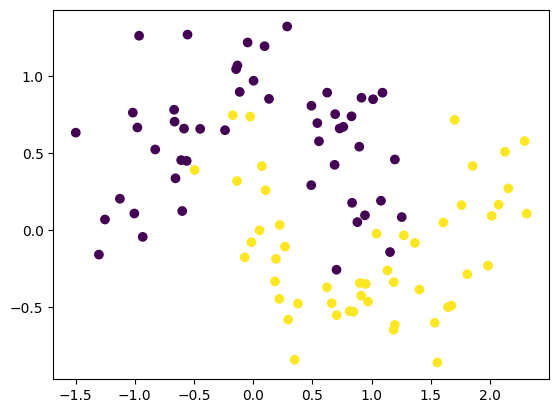

In [6]:
plt.scatter(x[:,0], x[:,1] , c = y)

In [10]:
model_1 = Sequential()

In [11]:
model_1.add(Dense(128, input_dim = 2, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = Adam(learning_rate=0.01)

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history_1 = model_1.fit(x, y, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
3/3 - 2s - 505ms/step - accuracy: 0.9625 - loss: 0.0615 - val_accuracy: 0.9500 - val_loss: 0.2760
Epoch 2/500
3/3 - 0s - 34ms/step - accuracy: 0.9750 - loss: 0.0596 - val_accuracy: 0.9500 - val_loss: 0.2621
Epoch 3/500
3/3 - 0s - 35ms/step - accuracy: 0.9750 - loss: 0.0545 - val_accuracy: 0.9500 - val_loss: 0.2601
Epoch 4/500
3/3 - 0s - 33ms/step - accuracy: 0.9750 - loss: 0.0549 - val_accuracy: 0.9500 - val_loss: 0.2580
Epoch 5/500
3/3 - 0s - 42ms/step - accuracy: 0.9750 - loss: 0.0564 - val_accuracy: 0.9500 - val_loss: 0.2615
Epoch 6/500
3/3 - 0s - 32ms/step - accuracy: 0.9750 - loss: 0.0562 - val_accuracy: 0.9500 - val_loss: 0.2694
Epoch 7/500
3/3 - 0s - 33ms/step - accuracy: 0.9750 - loss: 0.0560 - val_accuracy: 0.9500 - val_loss: 0.2799
Epoch 8/500
3/3 - 0s - 34ms/step - accuracy: 0.9750 - loss: 0.0551 - val_accuracy: 0.9500 - val_loss: 0.2857
Epoch 9/500
3/3 - 0s - 33ms/step - accuracy: 0.9750 - loss: 0.0556 - val_accuracy: 0.9500 - val_loss: 0.2876
Epoch 10/500
3/3 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 705us/step


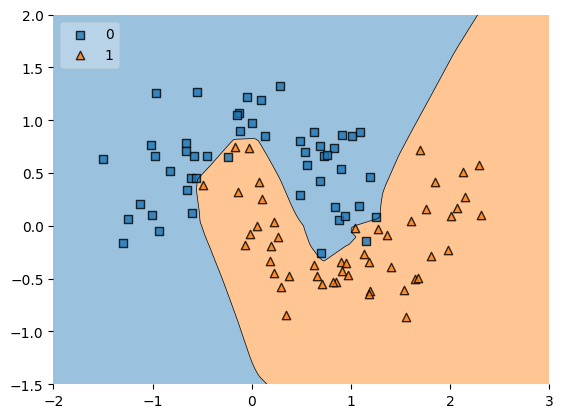

In [18]:
plot_decision_regions(x, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

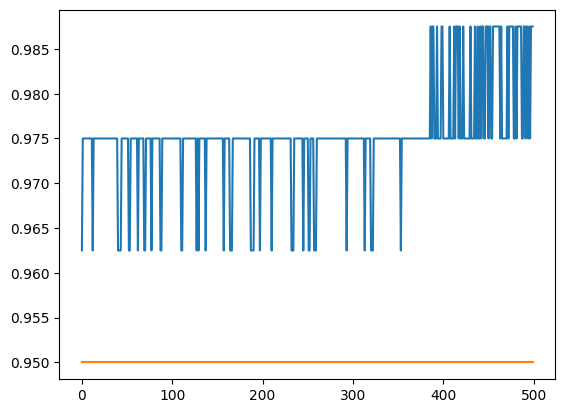

In [19]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])

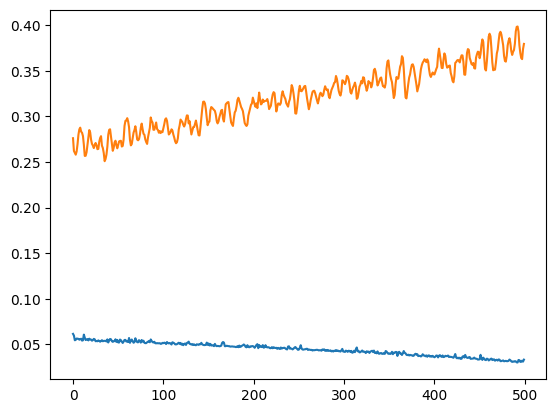

In [20]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

After adding Regularization

In [21]:
model_2 = Sequential()

In [22]:
model_2.add(Dense(128, input_dim = 2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_2.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_2.add(Dense(1, activation='sigmoid'))

d:\DL(campus_x)\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
adam = Adam(learning_rate=0.01)

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history_2 = model_2.fit(x, y, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
3/3 - 3s - 1s/step - accuracy: 0.7000 - loss: 1.9293 - val_accuracy: 0.9000 - val_loss: 1.8541
Epoch 2/500
3/3 - 0s - 93ms/step - accuracy: 0.8250 - loss: 1.8540 - val_accuracy: 0.9000 - val_loss: 1.7843
Epoch 3/500
3/3 - 0s - 32ms/step - accuracy: 0.8125 - loss: 1.7871 - val_accuracy: 0.9000 - val_loss: 1.7202
Epoch 4/500
3/3 - 0s - 34ms/step - accuracy: 0.8000 - loss: 1.7282 - val_accuracy: 0.9000 - val_loss: 1.6586
Epoch 5/500
3/3 - 0s - 33ms/step - accuracy: 0.8125 - loss: 1.6715 - val_accuracy: 0.9000 - val_loss: 1.5977
Epoch 6/500
3/3 - 0s - 40ms/step - accuracy: 0.8125 - loss: 1.6179 - val_accuracy: 0.9000 - val_loss: 1.5391
Epoch 7/500
3/3 - 0s - 41ms/step - accuracy: 0.8125 - loss: 1.5704 - val_accuracy: 0.9000 - val_loss: 1.4830
Epoch 8/500
3/3 - 0s - 43ms/step - accuracy: 0.8125 - loss: 1.5205 - val_accuracy: 0.9000 - val_loss: 1.4293
Epoch 9/500
3/3 - 0s - 39ms/step - accuracy: 0.8125 - loss: 1.4752 - val_accuracy: 0.9000 - val_loss: 1.3766
Epoch 10/500
3/3 - 0s

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 815us/step


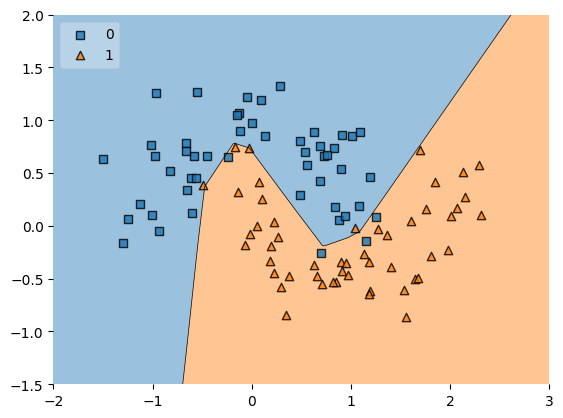

In [26]:
plot_decision_regions(x, y.astype('int'), clf = model_2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

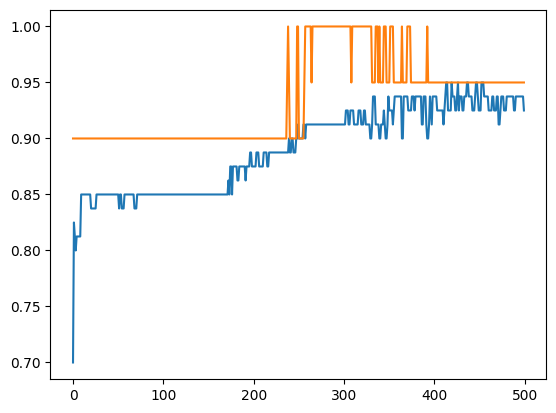

In [27]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

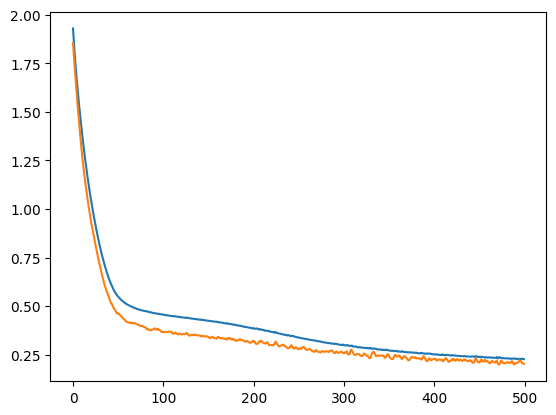

In [28]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])